In [127]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [128]:
NUMBER_OF_BINS = 10
NUMBER_OF_SAMPLES = 1000000

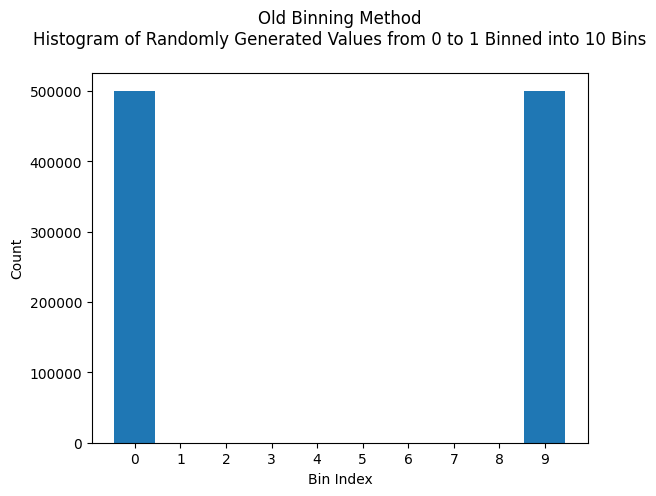

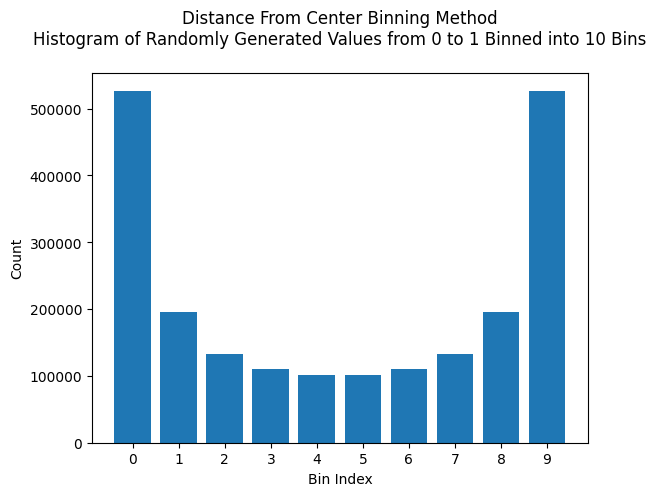

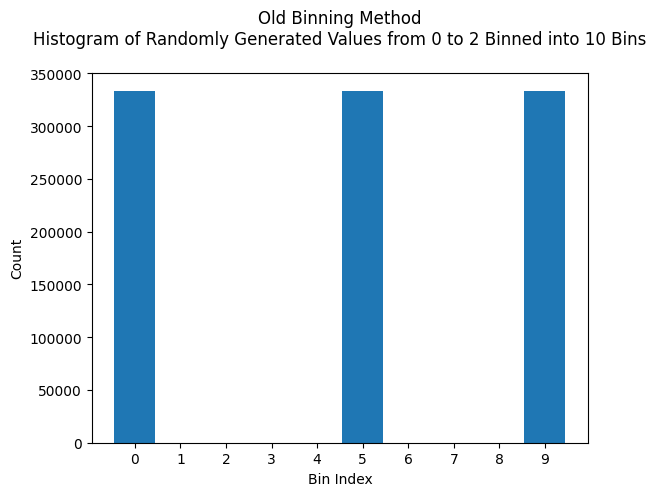

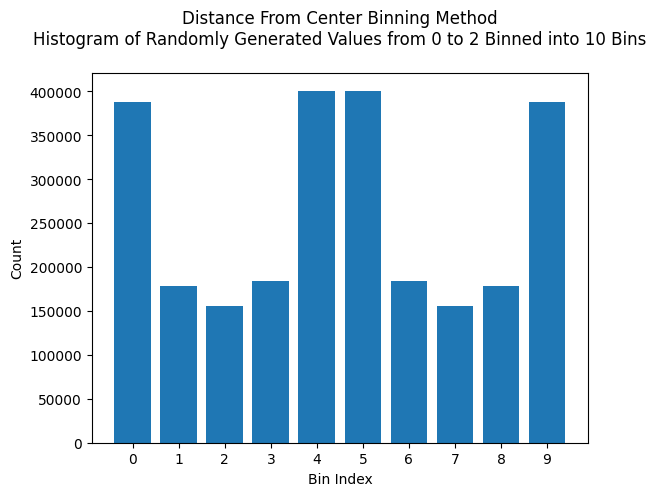

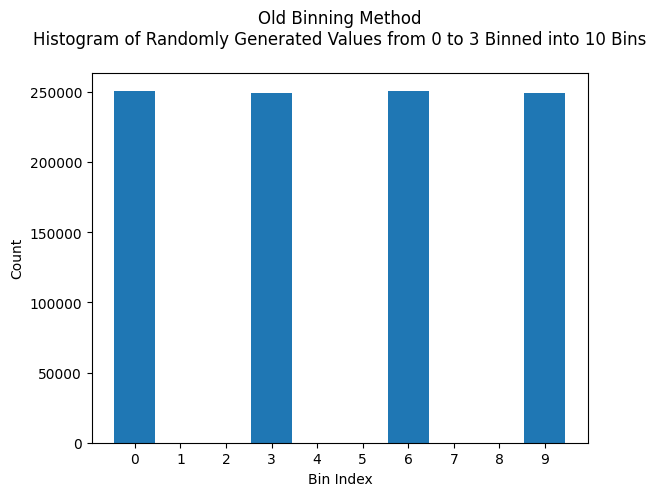

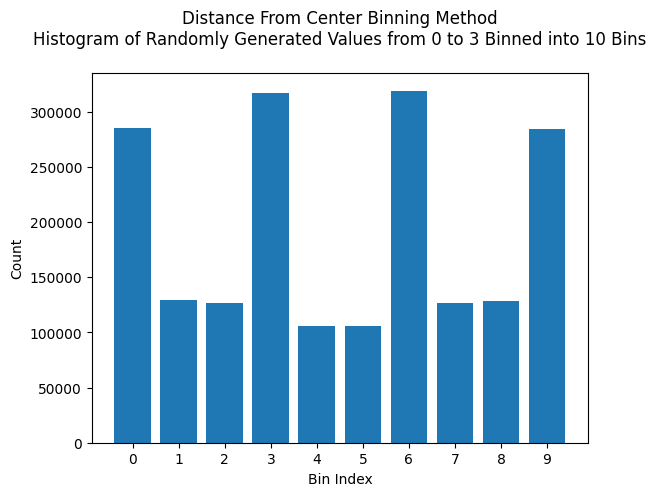

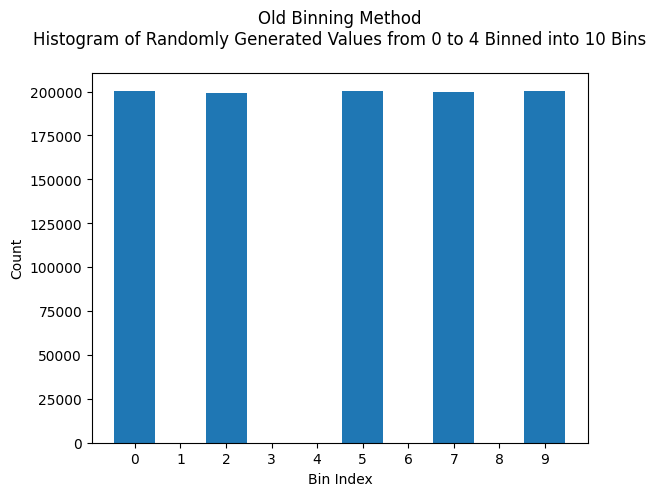

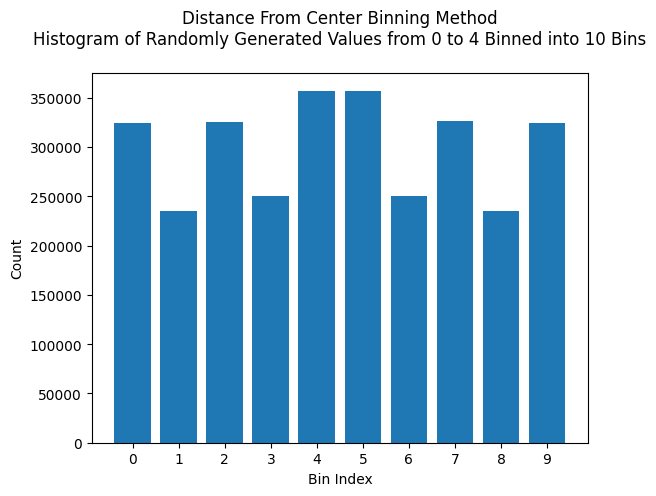

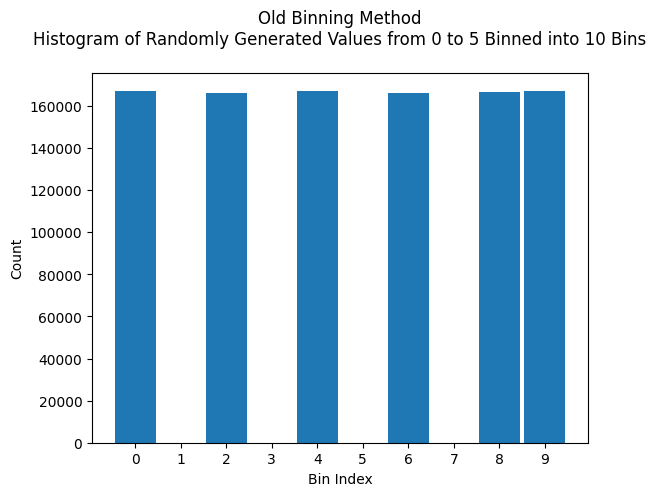

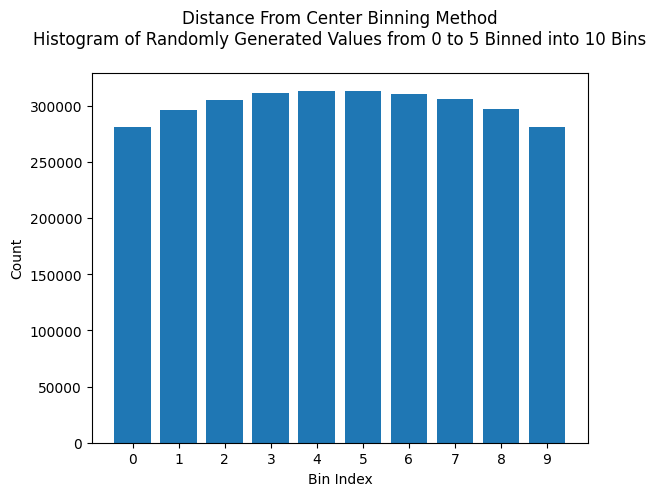

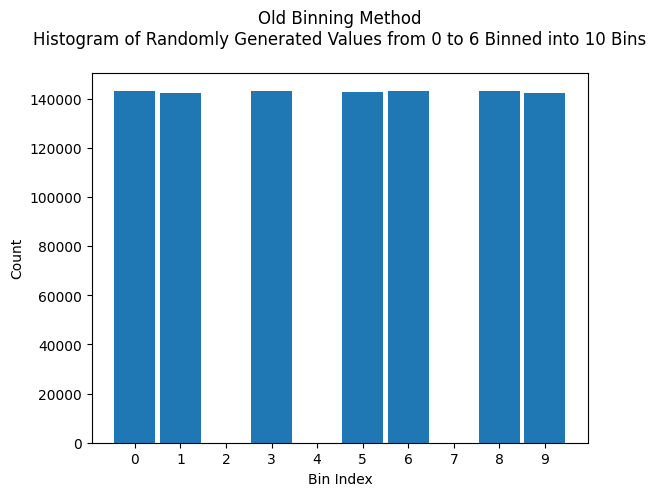

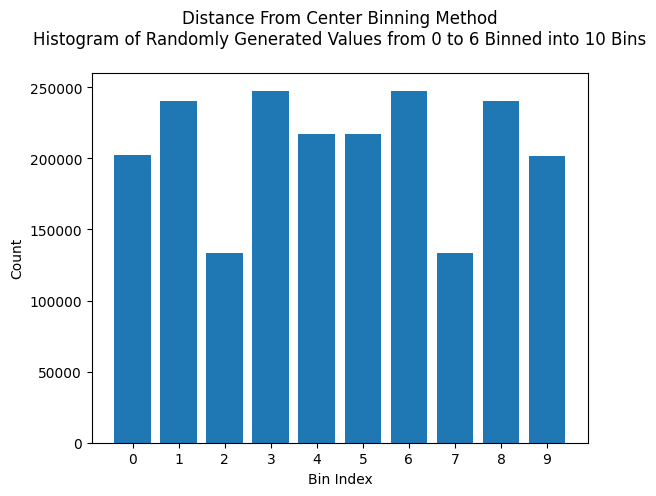

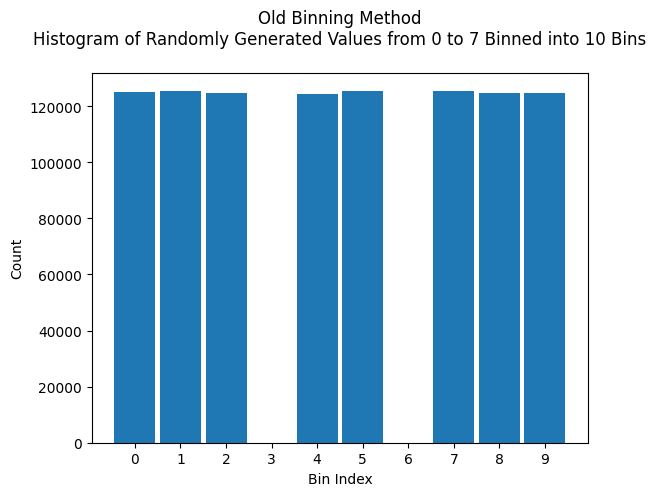

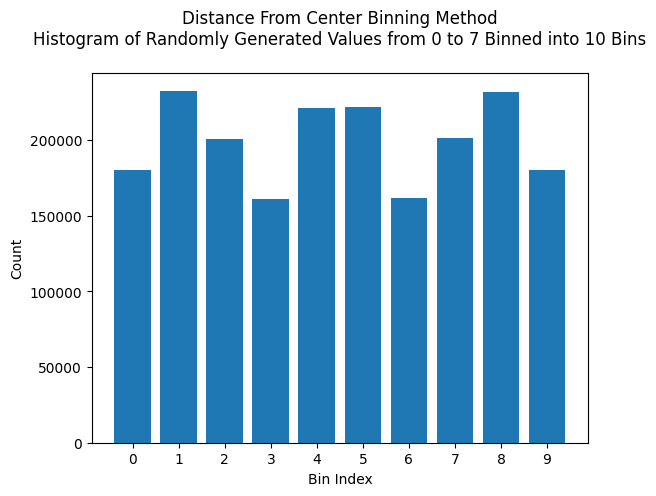

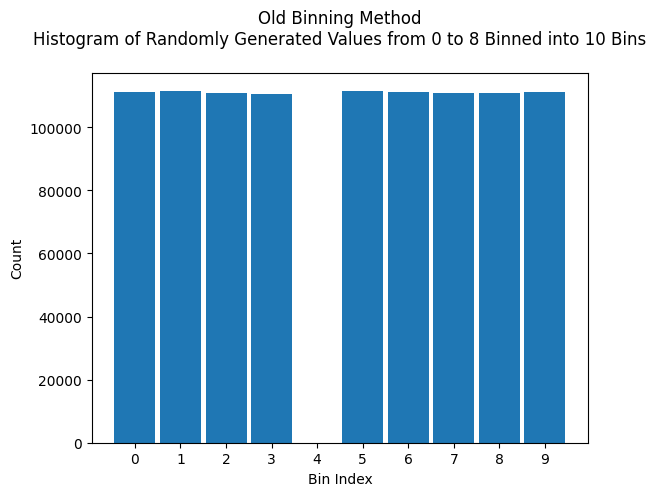

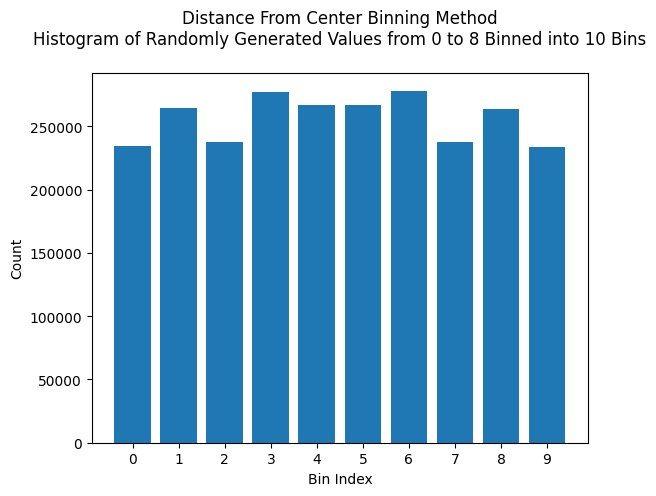

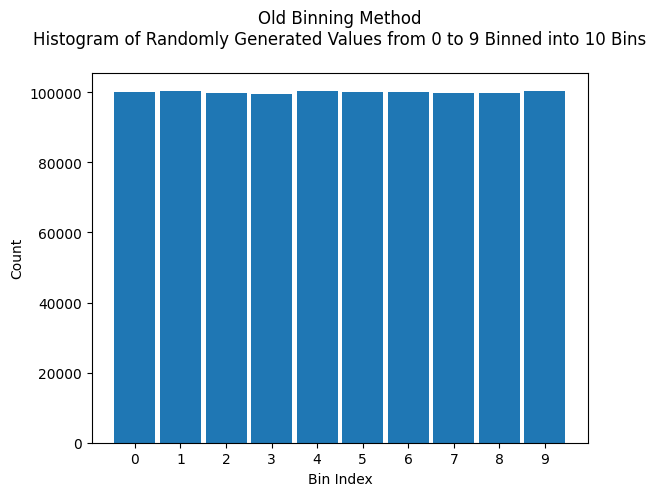

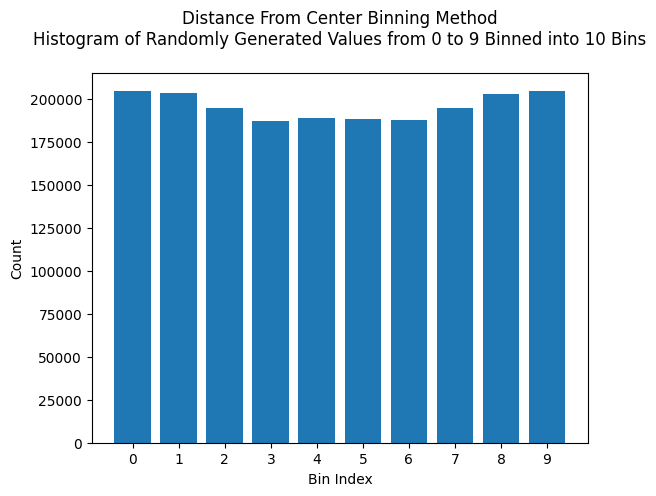

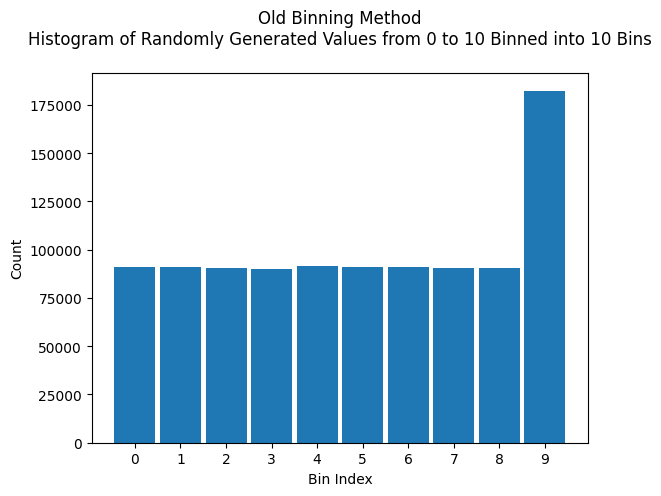

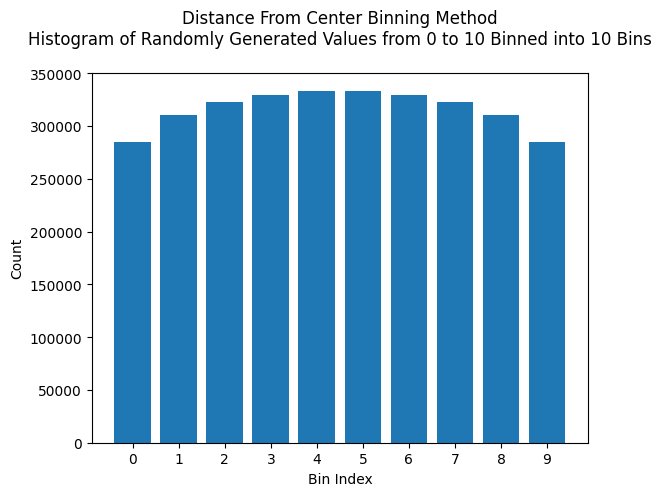

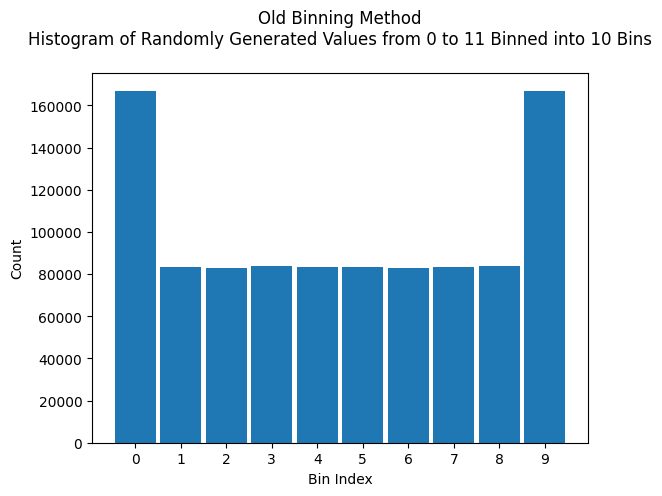

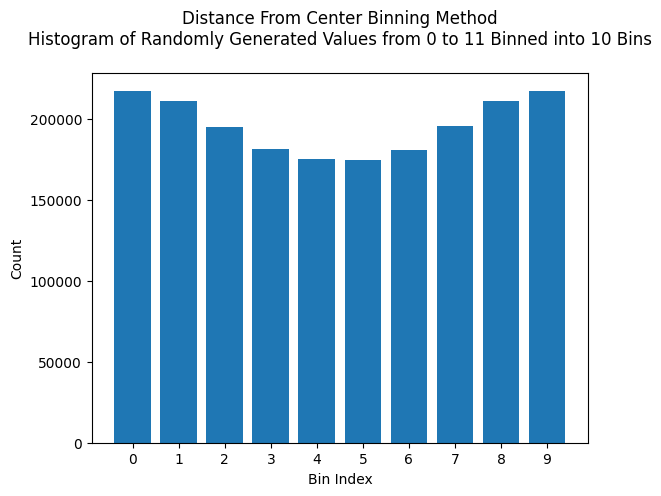

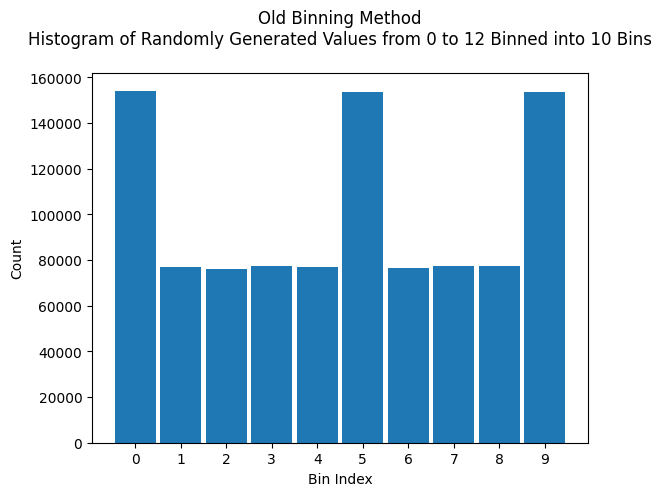

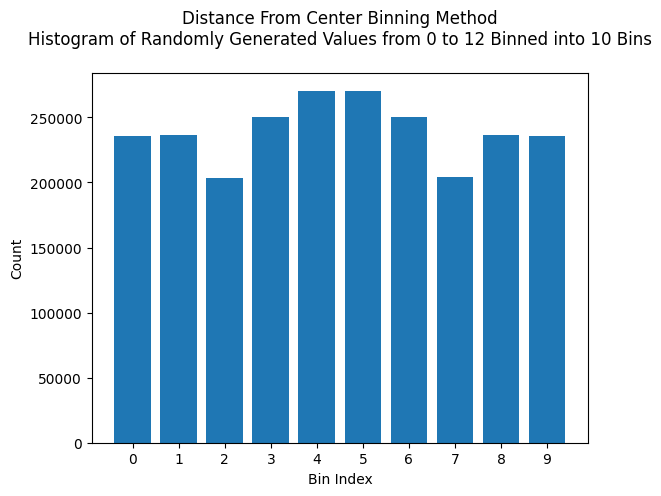

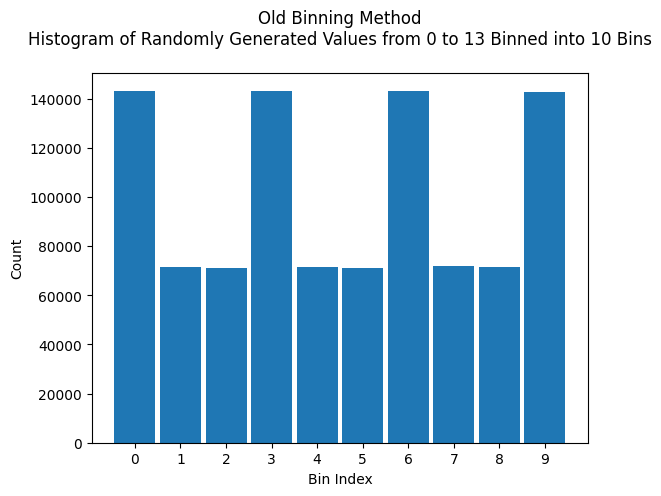

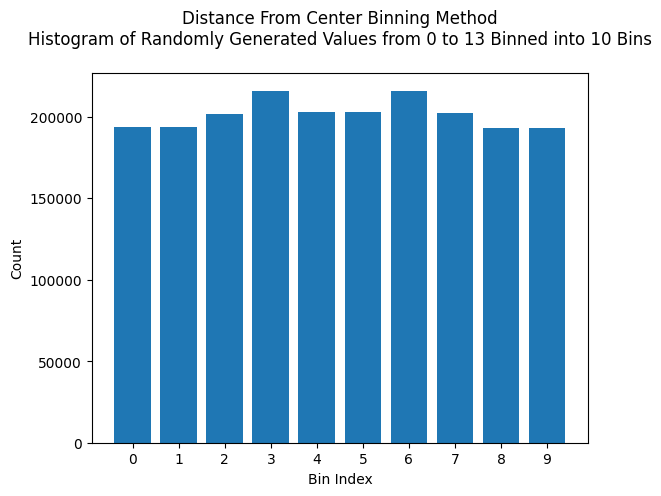

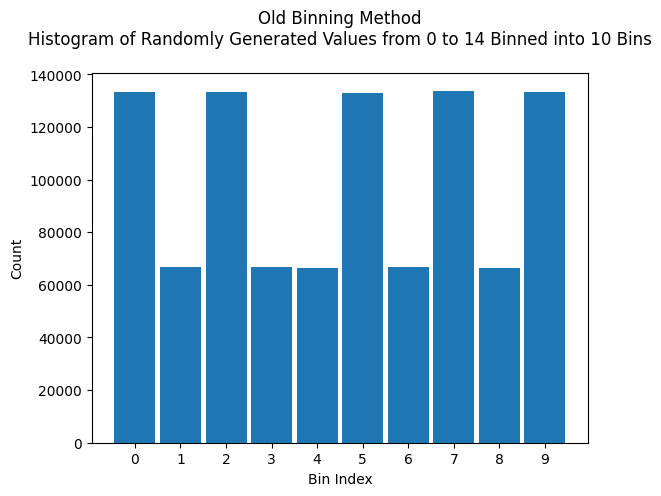

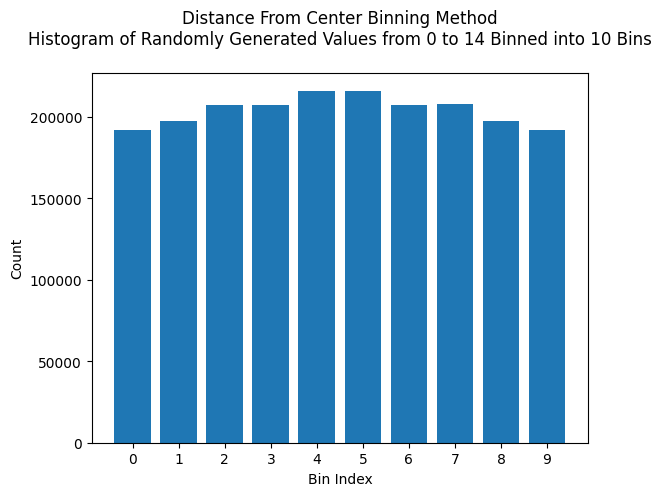

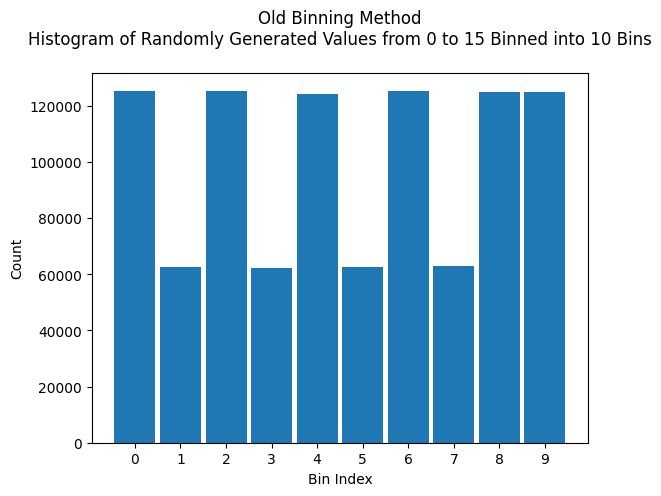

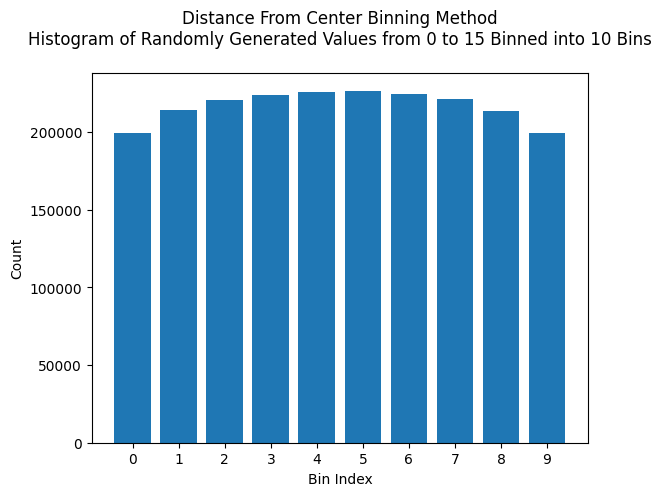

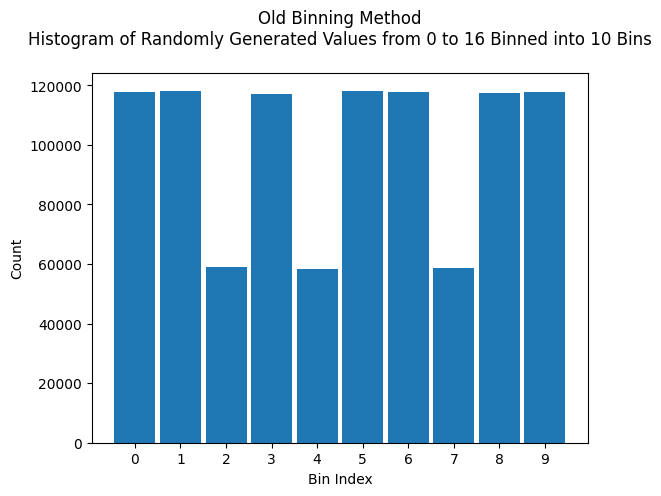

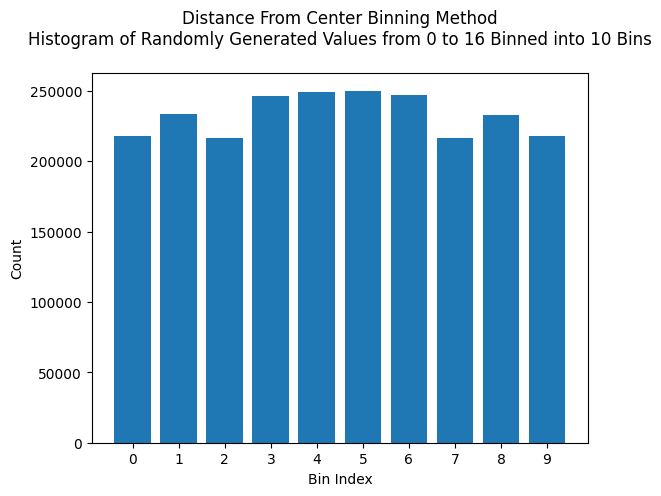

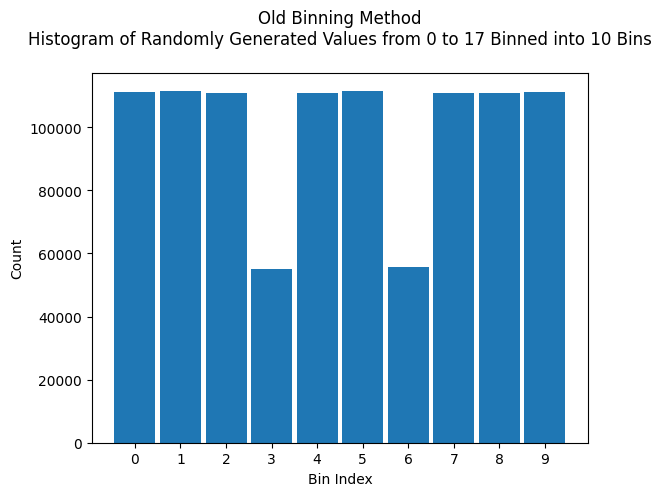

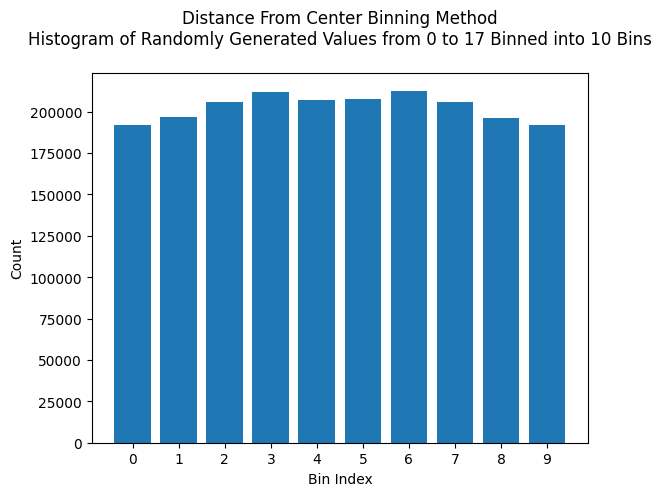

In [131]:
def old_binning(value_count):
    bins, _ = np.histogram(value_list, bins=bin_boundaries)

    _, ax = plt.subplots()
    ax.bar(list(range(NUMBER_OF_BINS)), bins, width=0.9)
    ax.set_xticks(list(range(NUMBER_OF_BINS)))
    ax.set_xlabel("Bin Index")
    ax.set_ylabel("Count")
    ax.set_title(f"Old Binning Method\nHistogram of Randomly Generated Values from 0 to {value_count - 1} Binned into {NUMBER_OF_BINS} Bins\n")

    plt.show()

def distance_binning(value_count):
    value_distance_from_centers = []
    for i in range(value_count):
        value_distance = np.array([abs(i - center) for center in centers])
        min_value_except_zero = min(value_distance[np.nonzero(value_distance)])
        if np.count_nonzero(value_distance) != len(value_distance):
            value_distance = value_distance / min_value_except_zero + 1
        else:
            value_distance = value_distance / min_value_except_zero

        value_distance_from_centers.append(value_distance)

    bins = np.zeros(NUMBER_OF_BINS)
    for val in value_list:
        for i, divisor in enumerate(value_distance_from_centers[val]):
            bins[i] += 1 / divisor

    fig, ax = plt.subplots()
    ax.bar(list(range(NUMBER_OF_BINS)), bins)
    ax.set_xticks(list(range(NUMBER_OF_BINS)))
    ax.set_xlabel("Bin Index")
    ax.set_ylabel("Count")
    ax.set_title(f"Distance From Center Binning Method\nHistogram of Randomly Generated Values from 0 to {value_count - 1} Binned into {NUMBER_OF_BINS} Bins\n")

    plt.show()

for value_count in range(2, 19):
    bin_boundaries = np.linspace(0, value_count - 1, NUMBER_OF_BINS + 1)
    centers = [(bin_boundaries[i - 1] + bin_boundaries[i]) / 2 for i in range(1, len(bin_boundaries))]
    random.seed(42)
    value_list = [random.randint(0, value_count - 1) for _ in range(NUMBER_OF_SAMPLES)]

    old_binning(value_count)
    distance_binning(value_count)